### Note book for optimising delta_r

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from optimizer import optimize_delta_r, optimize_step_size
from scipy.optimize import minimize_scalar, minimize
from physics.constants import m_earth_SI, m_moon_SI, d_earth_moon_SI

Optimal alpha: 1.048615601594771
Optimal delta_r: 64520.11551417081 km
Minimized relative std dev: 5.472669188602579e-05


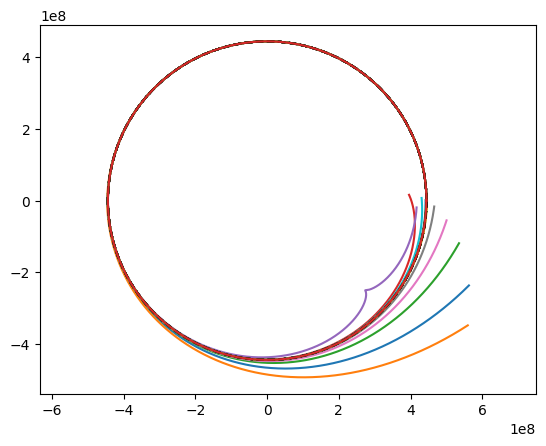

In [16]:
res = minimize_scalar(optimize_delta_r, bounds=(1.0486, 1.0487), method='bounded', options={'xatol': 1e-9})
print(f'Optimal alpha: {res.x}')
optimal_delta_r = res.x * d_earth_moon_SI * (m_moon_SI/(3*m_earth_SI))**(1/3)
print(f'Optimal delta_r: {optimal_delta_r * 1e-3} km')
print(f'Minimized relative std dev: {res.fun}')

In [17]:
base_L2 = d_earth_moon_SI * (m_moon_SI/(3*m_earth_SI))**(1/3)
#print(f'Optimal delta_r {base_L2*res.x*1e-3} km')
#print(o)
delta_rs = np.linspace(1.04861, 1.04862, 50) * base_L2


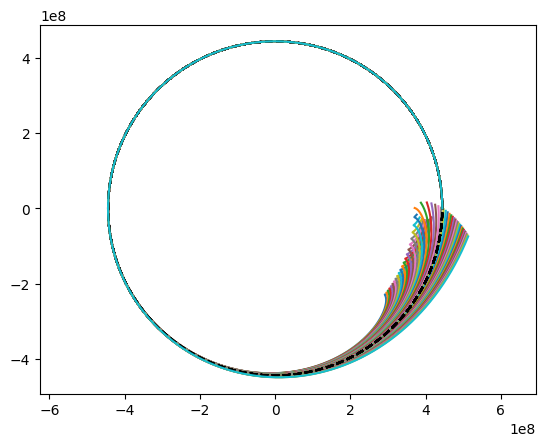

In [18]:
errors = []
for delta_r in delta_rs:
    ratio = delta_r / base_L2
    errors.append(optimize_delta_r(ratio))

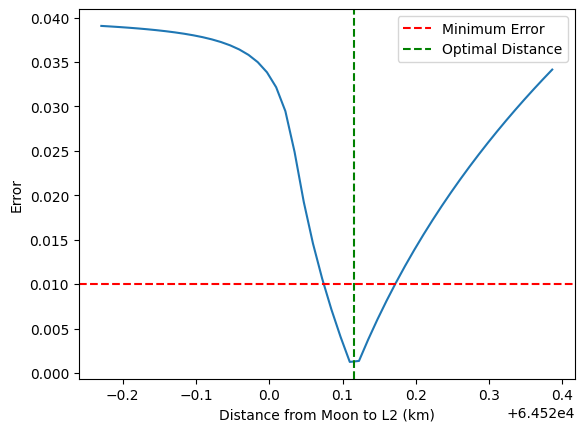

In [20]:
plt.plot(delta_rs*1e-3, errors)
plt.axhline(y=0.01, color='r', linestyle='dashed', label='Minimum Error')
plt.axvline(x=optimal_delta_r*1e-3, color='g', linestyle='dashed', label='Optimal Distance')
plt.legend()
plt.xlabel('Distance from Moon to L2 (km)')
plt.ylabel('Error')
plt.show()

In [11]:
res2 = minimize_scalar(optimize_step_size, bounds=(1e-1, 1e5), method='bounded')
optimal_step_size = res2.x
print(f'Optimal step size {optimal_step_size} s')

Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.11

In [ ]:
step_sizes = np.logspace(0, 5, 10)
print(step_sizes)

[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


In [21]:
errors2 = []
methods = ['Taylor', 'RK4','RK8']
for i,method in enumerate(methods):
    errors2.append([])
    for step_size in step_sizes:
        error2 = optimize_step_size(step_size, method)
        errors2[i].append(error2)

NameError: name 'step_sizes' is not defined

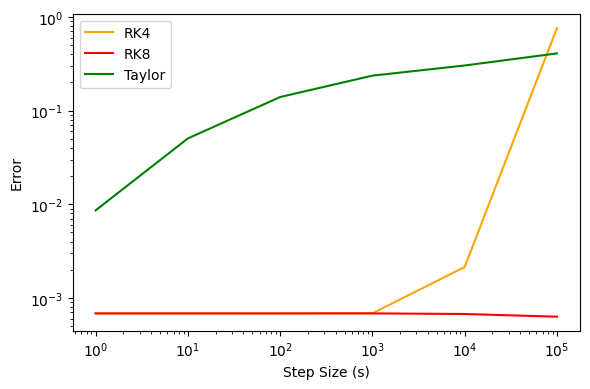

In [ ]:
optimal_step_size_index = np.argmin(errors2)
taylor = errors2[0]
rk4 = errors2[1]
rk8 = errors2[2]
plt.figure(figsize=(6,4))
plt.plot(step_sizes, rk4, label='RK4',color='orange')
plt.plot(step_sizes, rk8, label='RK8',color='red')
plt.plot(step_sizes, taylor, label='Taylor',color='green')

#plt.plot(optimal_step_size,
#         optimize_step_size(optimal_step_size),
#         'ro', label='Optimal Step Size')
#print(f'Optimal step size: {optimal_step_size} s with error {optimize_step_size(optimal_step_size)}')

plt.xlabel('Step Size (s)')
plt.ylabel('Error')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()
